# Hidding the Jitter


## Mostrar el rendimiento de Minimal en redes congestionadas

### Introduccion

Se ha realizado un experimento para determinar la calidad de transmisión al encontrarse en una red congestionada utilizando la herramienta Clumsy para gestionar las caractarísticas con las que se van a trasmitir datos.

<br>Los parametros de configuración de Clumsy los mostramos a continuación:
<br> 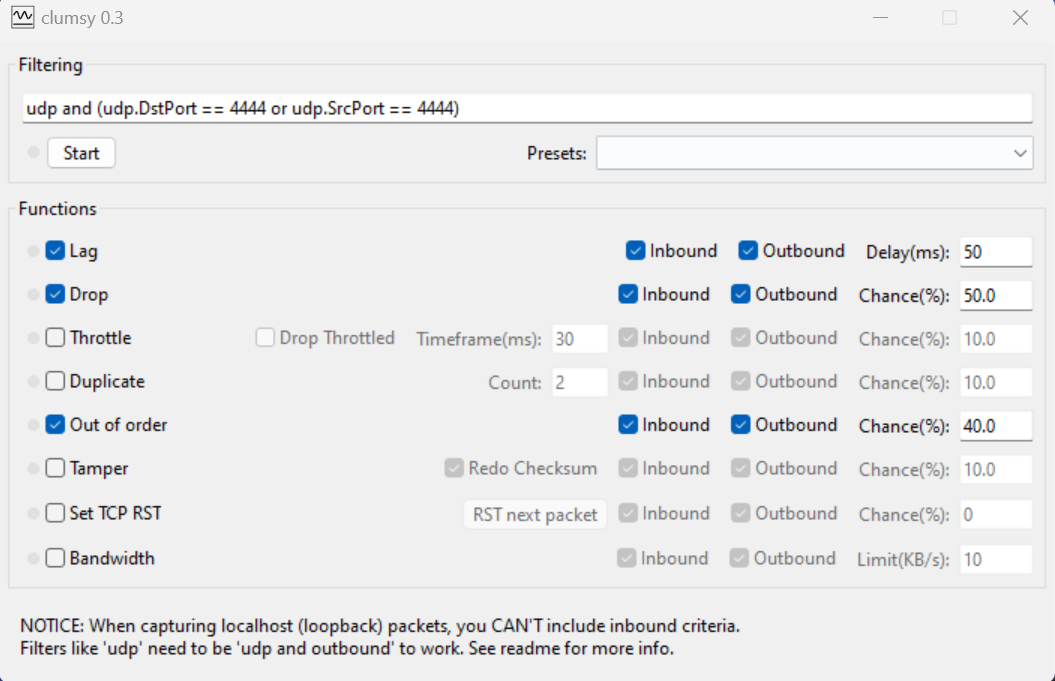


### Experiencia en una red saturada

Se tiene una grabación mostrando como los paquetes que se reciben se pierden o llegan más tarde por la simulación de congestión gracias al Clumsy. En esa [grabación](https://drive.google.com/file/d/1o4mAwOQNd_puHGK2BcwjGWN25dE4Lkm2/view?usp=sharing) también se ve modificaciones en tiempo real con el Clumsy.

Los comandos utilizados en este apartado son:

In [ ]:
python minimal.py -a [IP pública] --show_stats

### Conclusión

Lo que se puede deducir de este experimento es que cuando nos intentamos comunicar estando en una red congestionada la calidad del audio empeora debido a la pérdida y el desorden de llegada de los paquetes.

La experiencia se puede etiquetar como "No way" o en ocasiones seria mala ya que en la mayoria de ocasiones la comunicacion es realmente complicada.

## Tiempo minimo de buffering

###Introducción

En el siguiente experimento se busca establecer el delay mínimo con el que se debe configurar el intercom que se le puede introducir a una comunicación entre 2 dispositivos diferentes mientras se envían paquetes.

### Pruebas experimentales

Para ello, se fue probando con distintos valores el siguiente comando en cuestión:

In [ ]:
ping [IP pública]

In [ ]:
python buffer.py -a [IP pública] -b [tamaño del buffer] --show_stats

Los valores utilizados fueron los siguientes (siguiendo el orden en el que se muestra): 47, 10, 20, 1000, 250, 150, 100, 50, 75, 60, 65, 67.

### Conclusión


Durante las ejecuciones del comando con los distintos valores pudimos observar que cuanto mayor fuese el tamaño del buffer, mayor era el retardo de los mensajes. Al mismo tiempo, cuanto menor fuese el tamaño del buffer, mayores efectos causaba el desorden los de paquetes causando niveles de ruido superiores en la comunicación.

Finalmente, concluimos que el mejor valor para ambos dipositivos era el buffer de tamaño **67** ya que no generaba ninguno de los problemas anteriormente descritos.

## Experimento con tc (opcional)

### Introducción

En este apartado se trató de realizar un experimento similar pero utilizando el localhost como origen y final y aprovechando la herramienta TC de Linux para simular una red congestionada.

### Desarrollo del experimento:

Para simular la congestion en la red en este apartado se ha usado:

In [ ]:
sudo tc qdisc add dev lo root netem delay 1000ms 200ms 25%


El cual añade un retraso fijo de un segundo y un jitter aleatorio de 200ms.

Con esa norma establecida se ha ido variando el tamaño del buffer de buffer.py hasta que la calidad del audio fuese aceptable.

Finalmente el Tamaño del buffer minimo encontrado fue:


In [ ]:
python buffer.py --show_stats -b 335

Para encontrar ese valor se han ido probando diferentes tamaños del buffers, especificamente: 250 300 350 325 335 en este orden.

Con 325 aun se notaba una cantidad de ruido molesta, por ello el valor que salio mejor parado fue 335.


### Conclusión

Como conclusion se puede extraer que es necesario un buffer mayor al jitter (135ms en este caso) para poder paliarlo.